# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [8]:
#1 loading dataset
import pandas as pd 
df = pd.read_csv('./data/ForeignGifts_edu.csv')

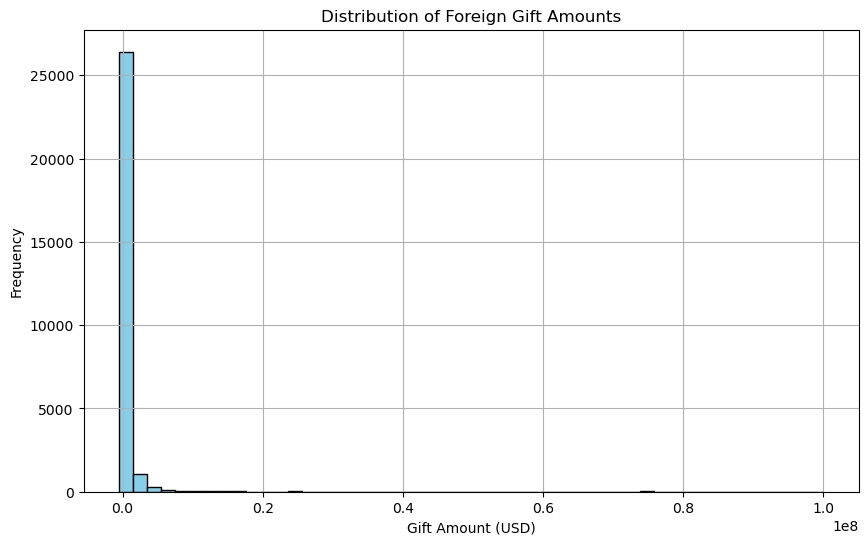

In [9]:
#2. 
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Foreign Gift Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Foreign Gift Amounts')
plt.xlabel('Gift Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This histogram shows a right skewed distribution with many smaller gifts and very few larger gifts which are close to or exceeding $80 million. This stretches the scale nad make the smaller values appear compressed. This also tell sus that while most foreign donations are decent in size there are few outliers that exist that dominate the total financial impact.

In [10]:
#3
gift_type_counts = df['Gift Type'].value_counts()
gift_type_proportions = df['Gift Type'].value_counts(normalize=True)

print("Gift Type Counts:")
print(gift_type_counts)
print("\nGift Type Proportions:")
print(gift_type_proportions)


Gift Type Counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


In [12]:
#4 
import numpy as np
import seaborn as sns

df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount'])
# this was done to handle skewness

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


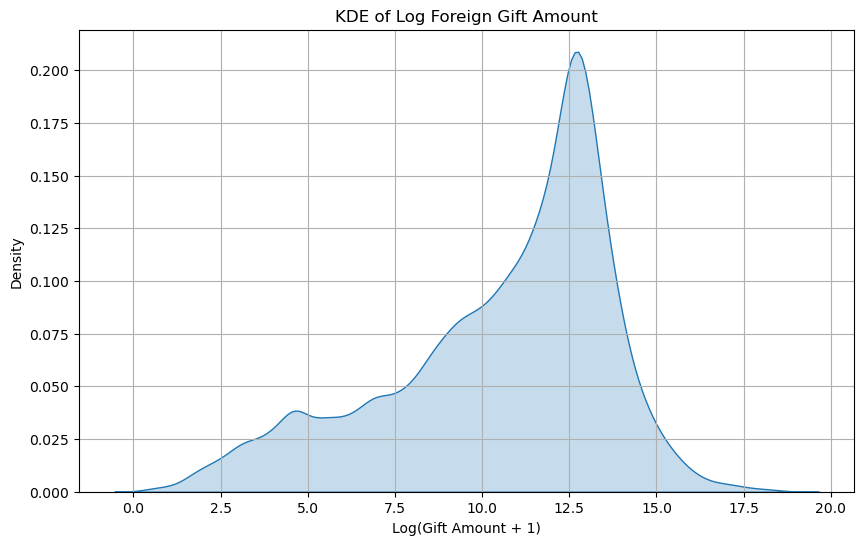

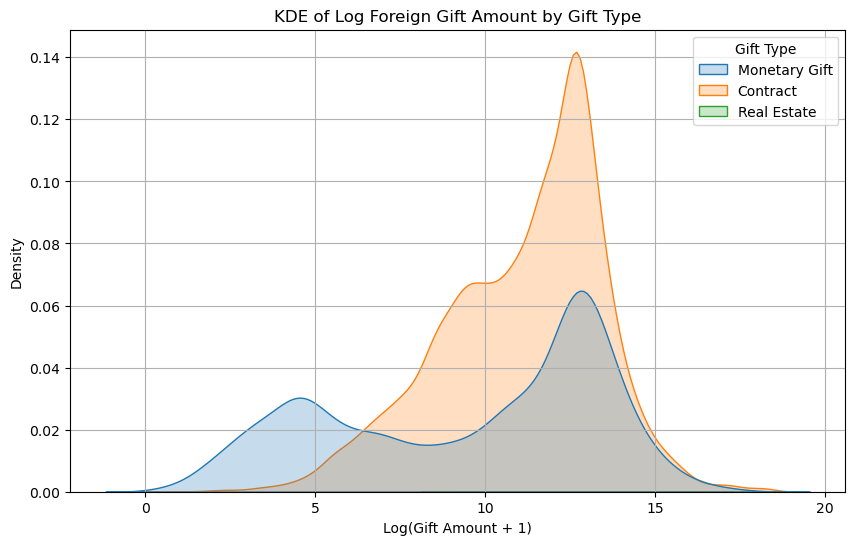

In [14]:
# overall all kde plot:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Log Foreign Gift Amount'].dropna(), fill=True)  
plt.title('KDE of Log Foreign Gift Amount')
plt.xlabel('Log(Gift Amount + 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# kde plot by gift type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', fill=True)  
plt.title('KDE of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log(Gift Amount + 1)')
plt.ylabel('Density')
plt.grid(True)
plt.show()



The first plot shows that most foreign gifts are on the smaller side, with a few really large ones pulling the curve to the right. When broken down by gift type, contracts tend to be the biggest and most consistent, peaking higher than the others. Monetary gifts have a wider range, and real estate gifts are less common and usually smaller.

In [17]:
#5 Top 15 countries by Number and Amount of Gifts

top_countries_count = df['Country of Giftor'].value_counts().head(15)
print("Top 15 Countries by Number of Gifts:")
print(top_countries_count)

top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 Countries by Total Gift Amount:")
print(top_countries_amount)

Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 Countries by Total Gift Amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA  

In [18]:
#6 
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Institutions by Total Gift Amount:")
print(top_institutions)

Top 15 Institutions by Total Gift Amount:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


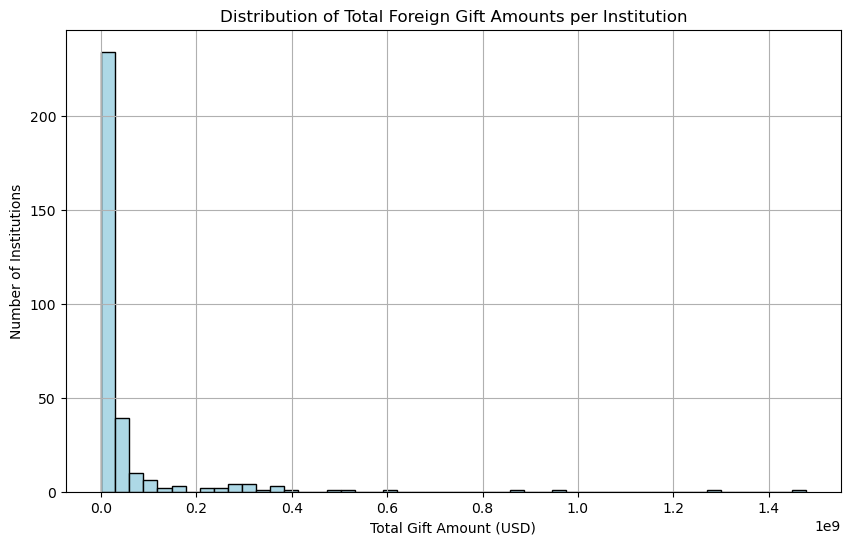

In [19]:
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Total Foreign Gift Amounts per Institution')
plt.xlabel('Total Gift Amount (USD)')
plt.ylabel('Number of Institutions')
plt.grid(True)
plt.show()

Carnegie Mellon, Cornell, and Harvard top the list of institutions receiving the most foreign gift money, with CMU receiving nearly $1.5 billion. The histogram shows that most schools get much smaller totals, while just a few receive extremely large amounts. 

In [20]:
#7. 
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Giftors by Total Amount Given:")
print(top_giftors)


Top 15 Giftors by Total Amount Given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


The top giftors gave hundreds of millions in total, with just a few names contributing the bulk of the money. These major donors likely represent foreign governments, organizations, or individuals with strong ties to U.S. institutions. The distribution is very topheavy. Most giftors gave small amounts, but a few gave extremely large sums.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [1]:
#1.

import pandas as pd 
df = pd.read_csv('./data/drilling_rigs.csv')

print(df.head())
print(df.info())
print(df.shape)

# observation (rows) there are 623 
# variable 10


           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

1. Many of the numeric variables in the dataset arent correctly read in by pandas. While dataset contains 10 columns and 623 observations, only 3 of columns are recognized as numeric int64 while remaining 7 are treated as object types. This issue occurs because serval of the rig count columns contain entries like not available which causes pandas to interpret the entire column as text. TO clean data we will first need to convert the Month column into proper datetime object so that the time series analysis can be performed. All rig-related columns will be typecast to numeric using the pd.to_numeric and set the errors='coerce' which convert non-numeric strings to NaN. After that we will choose how to handle the missing values like by dropping them or using forward-fill to preserve continuity in timeseries.

In [2]:
#2
df['time'] = pd.to_datetime(df['Month'], format='mixed')
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(method='ffill',inplace=True)

/var/folders/pm/fr4p6g5x33s7jjzlf3w9_hpm0000gn/T/ipykernel_59499/973327633.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


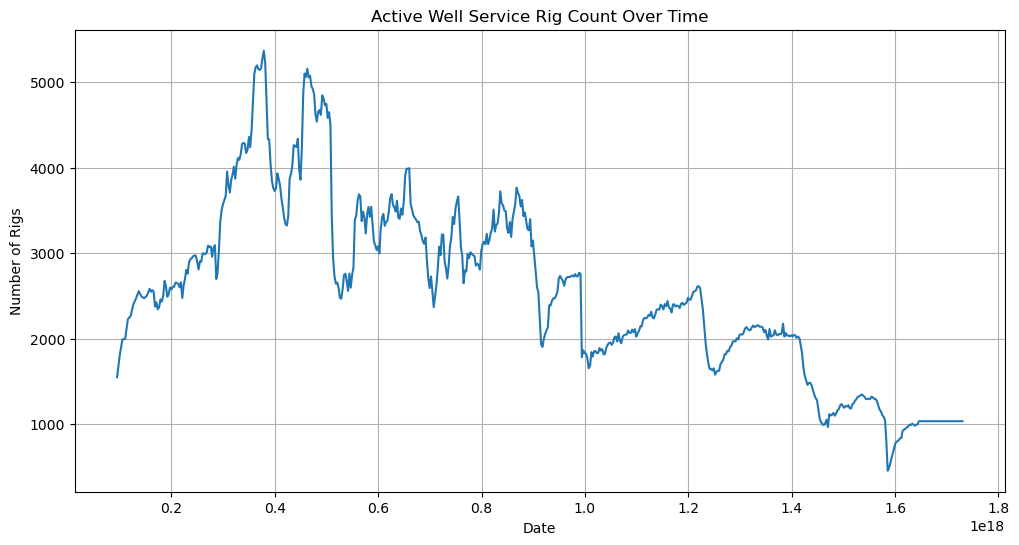

In [3]:
#3
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

The plot shows the number of active well service rigs over time. Rig counts rise sharply at first, peak above 5,000, then drop suddenly probably because of oil price crashes like in 2014–2016 and events like COVID-19 in 2020. The line goes up and down a lot, showing how the industry reacts to market changes. In recent years, the count drops and stays lower, showing a slowdown in drilling activity.

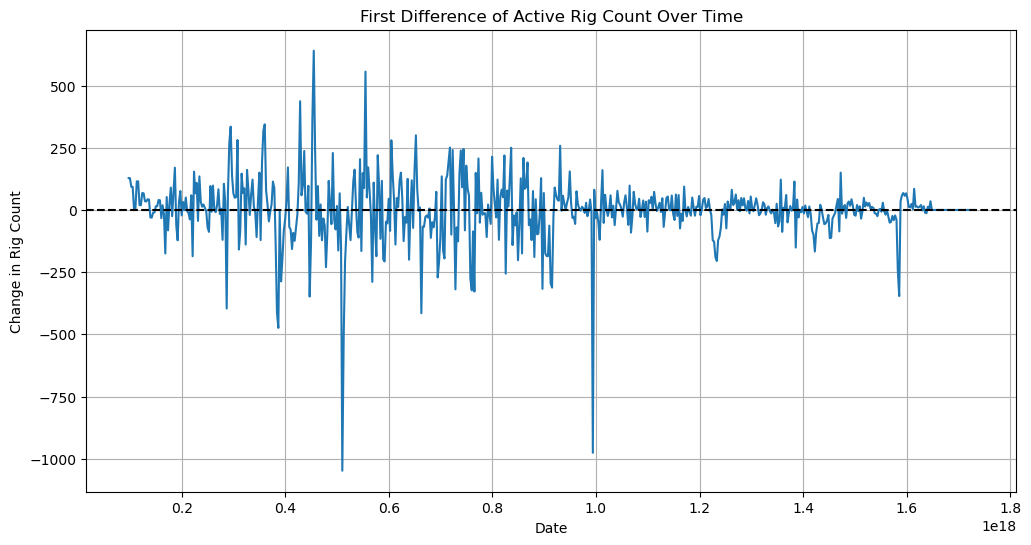

In [4]:
#4
df['rig_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['rig_diff'])
plt.title('First Difference of Active Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Rig Count')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()

The plot shows the monthly change in the number of active well service rigs. We see a lot of volatility early on, with big spikes both up and down. Some changes are over +500 or below -1000 rigs in a single period. This shows the sharp industry shifts probably becuase of the economic events. The fluctuations become smaller and more stable in the later years, but there are still a few noticeable drops, especially around the time of the 2020 COVID-19 pandemic, when many rigs were shut down quickly. Overall, the graph shows how sensitive rig activity is to market conditions.

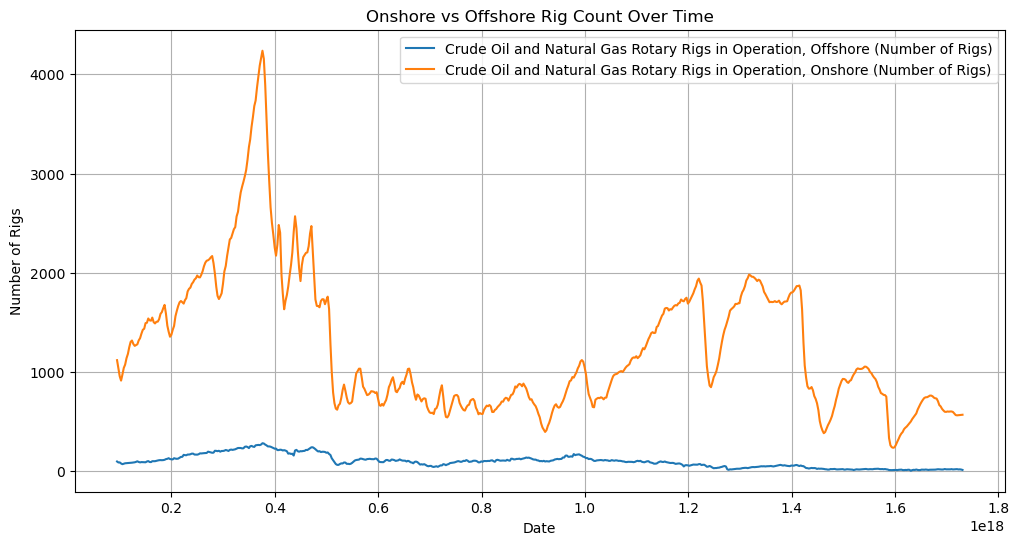

In [6]:
#5
melted = df.melt(
    id_vars='time',
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig Type',
    value_name='Count'
)

plt.figure(figsize=(12, 6))
for label, group in melted.groupby('Rig Type'):
    plt.plot(group['time'], group['Count'], label=label)

plt.title('Onshore vs Offshore Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.legend()
plt.grid(True)
plt.show()